In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path
import sys
# Set sys path
sys.path.append(str(Path(os.getcwd()).parent))

In [3]:
# Adjust matplotlib settings for font inclusion
plt.rcParams['pdf.fonttype'] = 42  # Use Type 3 (PostScript) fonts
plt.rcParams['ps.fonttype'] = 42

# Set filpaths for data and figures
notebook_dir = os.getcwd()
file_path = Path(notebook_dir).parent / 'data' 

# Load data

In [9]:
df = pd.read_csv(file_path / "AD_CSF_full_study.pg_matrix.tsv", sep='\t')
gene_dict = dict(zip(df['Protein.Group'], df['Genes']))
prot = df.set_index('Protein.Group').iloc[:,4:].T
prot.index = [a.split('/')[-1] for a in prot.index]
prot.index = [a.split('.')[0] for a in prot.index]
prot = np.log10(prot.replace(0, np.nan))

In [11]:
d_groups = pd.read_excel(file_path / "annotation of samples_AM1.5.11.xlsx")
d_groups = d_groups.dropna(subset='sample name')
cat = d_groups.set_index('sample name')[['biochemical AD classification']]
cat.index = [a.split('.')[0] for a in cat.index]

# xgboost with holdout_batch testset and scambled labels

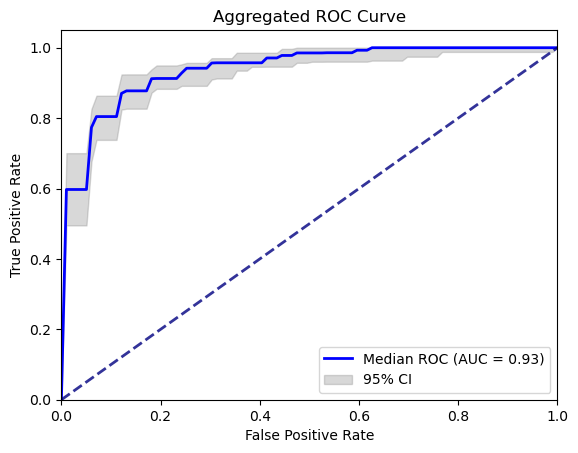

In [ ]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot, cat, gene_dict, between='biochemical AD classification')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot('biochemical control', 'biochemical AD', n_runs=10, n_estimators=100)

Running iteration 1/10
Running iteration 2/10
Running iteration 3/10
Running iteration 4/10
Running iteration 5/10
Running iteration 6/10
Running iteration 7/10
Running iteration 8/10
Running iteration 9/10
Running iteration 10/10


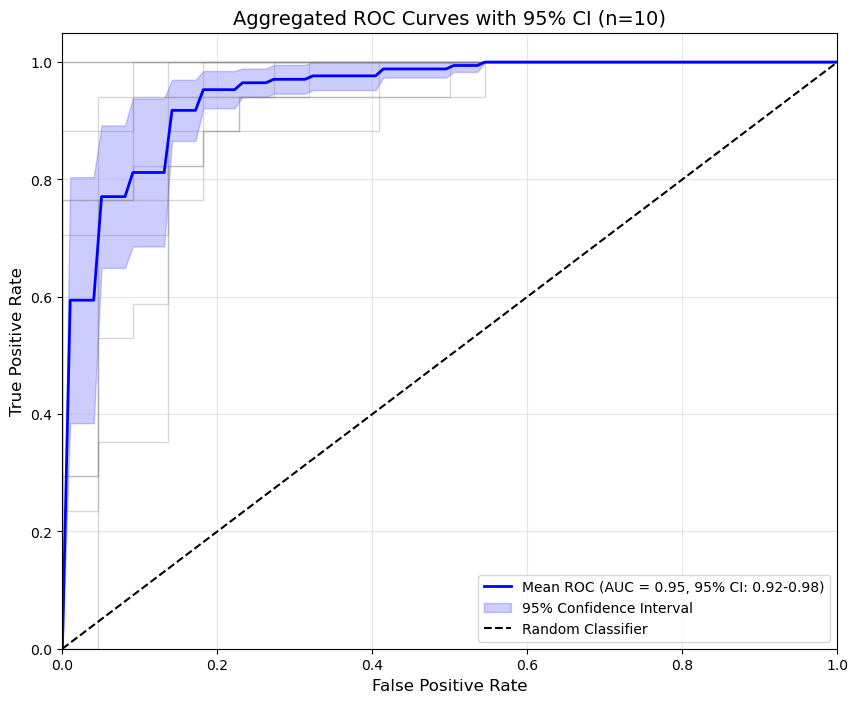

Plots saved to d:\Notebooks\ADAPT-MS\data\AD_CSF_fullcohort_10x_5foldCV.pdf


In [28]:
from utils.NonValClassifier import NonValClassifier

classifier = NonValClassifier(prot, cat, gene_dict, between='biochemical AD classification')

# Run the multiple train-test split process
classifier.classify_and_plot_multiple(
    category1="biochemical control", 
    category2='biochemical AD', 
    num_repeats=10
)

classifier.save_plots_to_pdf(file_path / 'AD_CSF_fullcohort_10x_5foldCV.pdf')